<a href="https://colab.research.google.com/github/Ashok401/AIML_BootCamp/blob/main/Capstone_iPhone_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Data set : https://www.kaggle.com/datasets/mrmars1010/iphone-customer-reviews-nlp
%pip install vaderSentiment
# Download required NLTK data
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

review_df = pd.read_csv('/content/iphone.csv')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
review_df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [4]:
review_df.shape

(3062, 11)

In [5]:
df = review_df.dropna(axis=0).copy()

In [6]:
df.shape

(2960, 11)

In [7]:
df[df['ratingScore'] == 5].value_counts().sum()

np.int64(1539)

In [8]:
df = df[df['isVerified']]

In [9]:
df['variant'].describe()
#Most popular model from the set: Colour: BlueSize: 128 GB

,variant
count,2761
unique,83
top,Colour: BlueSize: 128 GB
freq,284


In [10]:
df['reviewDescription'].describe()
#AI : Yujin : How can I get more insights ?


,reviewDescription
count,2761
unique,2115
top,Good
freq,32


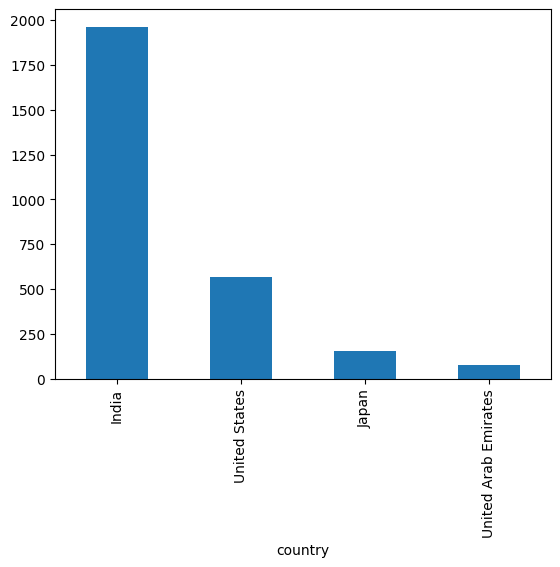

In [11]:
df['country'].value_counts().plot(kind='bar')
plt.show()

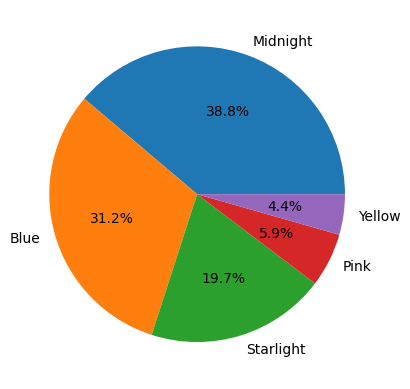

In [12]:
MidnightSize = df['variant'].str.contains('Color: MidnightSize', na = False).sum()
Blue = df['variant'].str.contains('Color: Blue', na = False).sum()
Starlight = df['variant'].str.contains('Color: Starlight', na = False).sum()
Pink = df['variant'].str.contains('Color: Pink', na = False).sum()
Yellow = df['variant'].str.contains('Color: Yellow', na = False).sum()

plt.pie([MidnightSize, Blue, Starlight, Pink, Yellow], labels=['Midnight', 'Blue', 'Starlight', 'Pink','Yellow'], autopct='%1.1f%%')
plt.show()

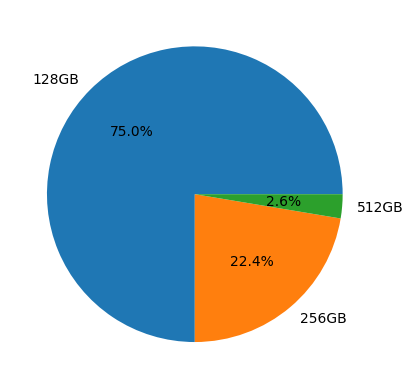

In [13]:
Size_128 = df['variant'].str.contains('Size: 128GB', na = False).sum()
Size_256 = df['variant'].str.contains('Size: 256GB', na = False).sum()
Size_512 = df['variant'].str.contains('Size: 512GB', na = False).sum()
plt.pie([Size_128, Size_256, Size_512], labels=['128GB', '256GB', '512GB'], autopct='%1.1f%%')
plt.show()


In [14]:
matched = df[df['reviewDescription'].str.contains('not happy', na = False)]['reviewDescription']
matched.str.lstrip()
#AI : Yujin : How can I get full text here? Ashok : I fixed it.


,reviewDescription
1158,I recently purchased I phone 14 and I'm not ha...
1641,"Happy with the phone, but not happy with the s..."
1681,I bought it in good condition. I paid $450 but...
3058,iam not happy with this product why because ch...


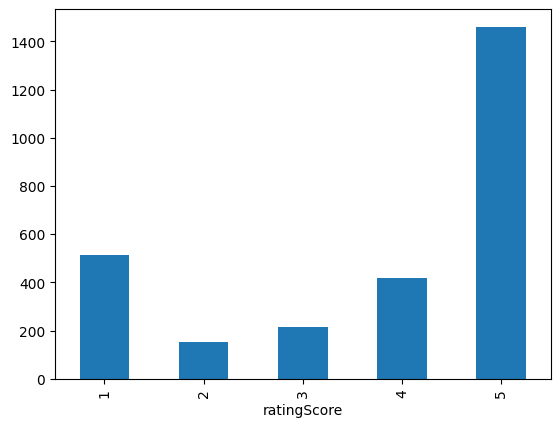

In [15]:
df['ratingScore'].value_counts().reindex([1, 2, 3, 4, 5]).plot(kind='bar')
plt.show()

plt.show() # Go with order (1, 2, ... 5) # Ashok : Fixed.

In [16]:
df[df['ratingScore'] == 5]['variant'].describe()

,variant
count,1460
unique,69
top,Colour: BlueSize: 128 GB
freq,113


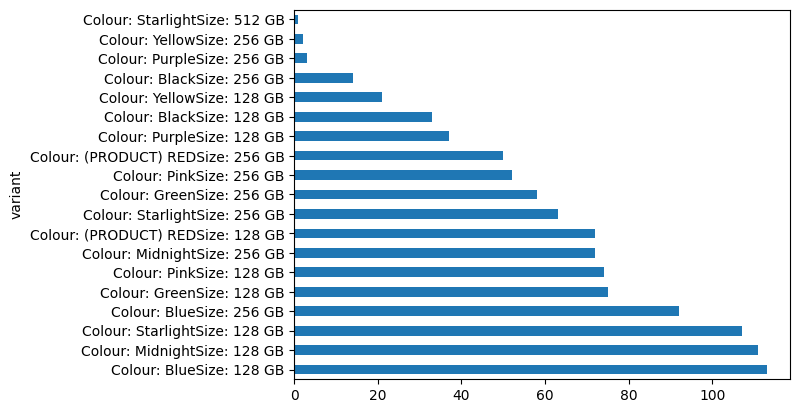

In [17]:
filtered = df[(df['ratingScore'] == 5) & (df['country']=='India')]
filtered['variant'].value_counts().plot(kind='barh')
plt.show() #Horizantal bar-chart (Fixed), do more work, use heat map (work in progress)

<function matplotlib.pyplot.show(close=None, block=None)>

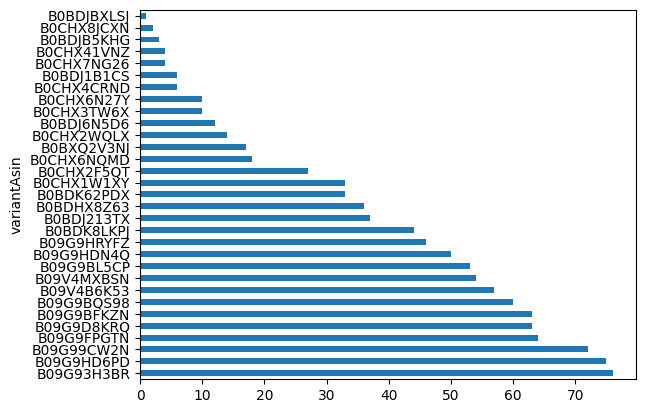

In [18]:
filtered['variantAsin'].value_counts().plot(kind='barh')
plt.show #Horizontal (fixed), check why mapping is diff wrt above(work in progress).

In [32]:
df['review'] = df['reviewTitle'] + ' ' + df['reviewDescription']
df['word_count'] = df['review'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
sorted_df = df.sort_values(by='word_count', ascending=False)
top100 = sorted_df.nlargest(100, 'word_count')
top100.to_csv('top100_wordcounts.csv', index=False)
# top 10 topics from chatgpt
prompt = '''top 10 topics from chatgpt'''
# Observation? Many people shared reviews on camera and battery life.

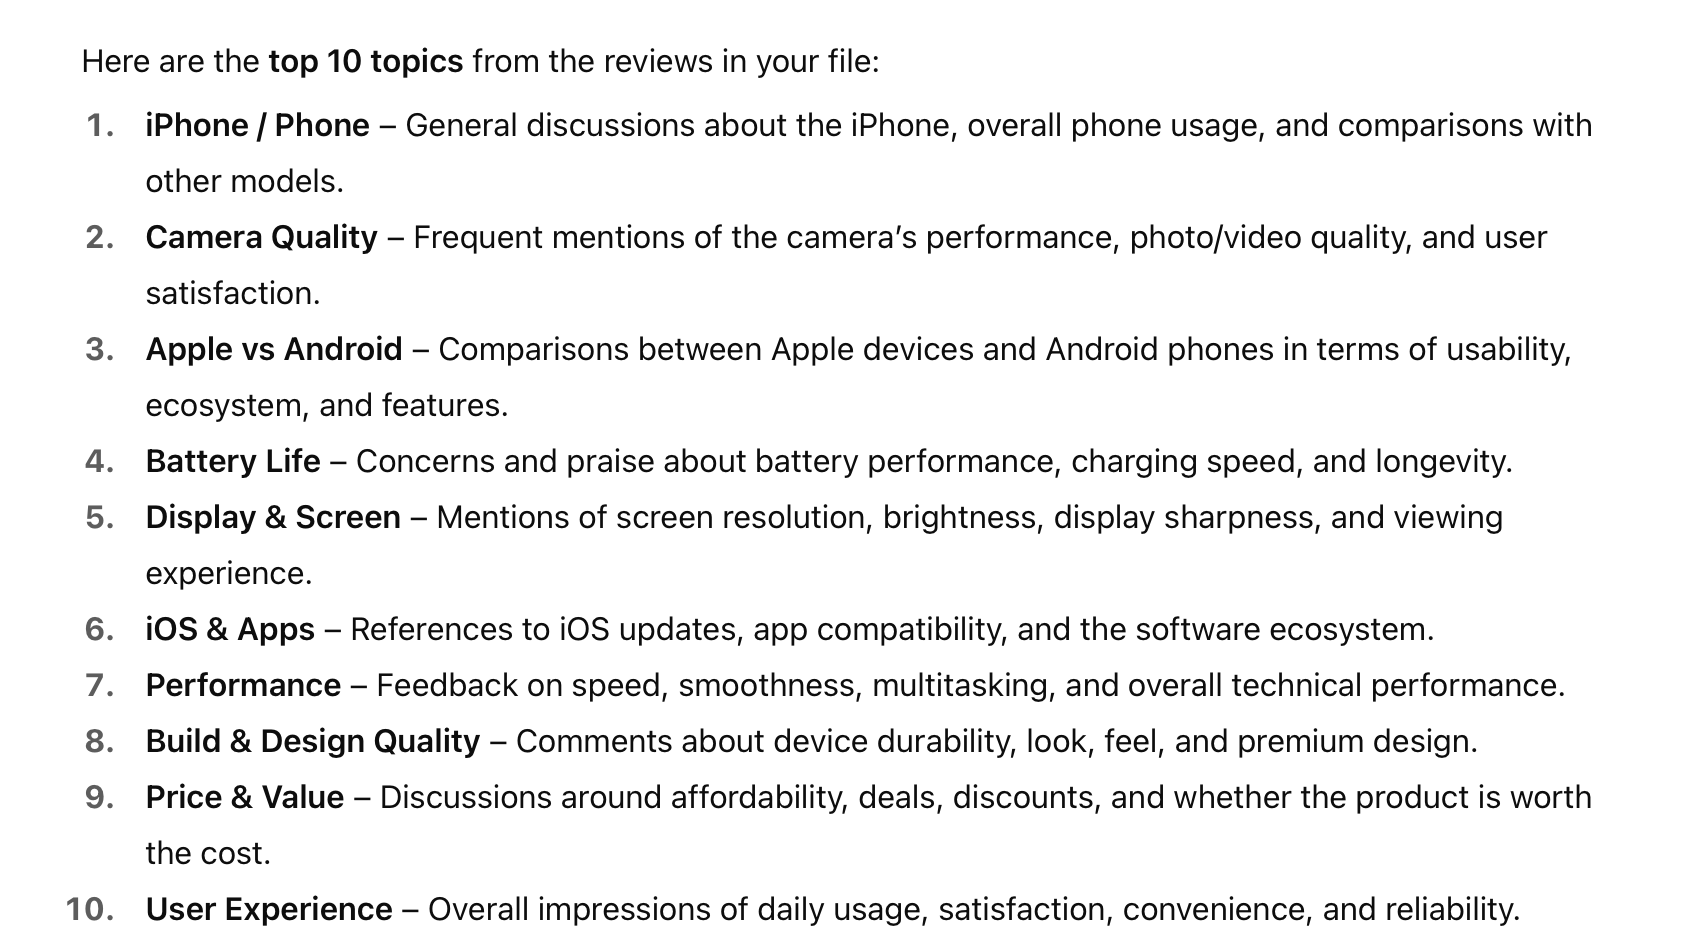

# promt engineering
# prompt = f"""
# Extract the top 10 topics discussed in the following text. Focus on key
# themes, subjects, or recurring ideas.
# Return the result as a numbered list with a short description for each topic.

#Text:
# \"\"\"
# {input_text} is from "top100_wordcounts"
# \"\"\"


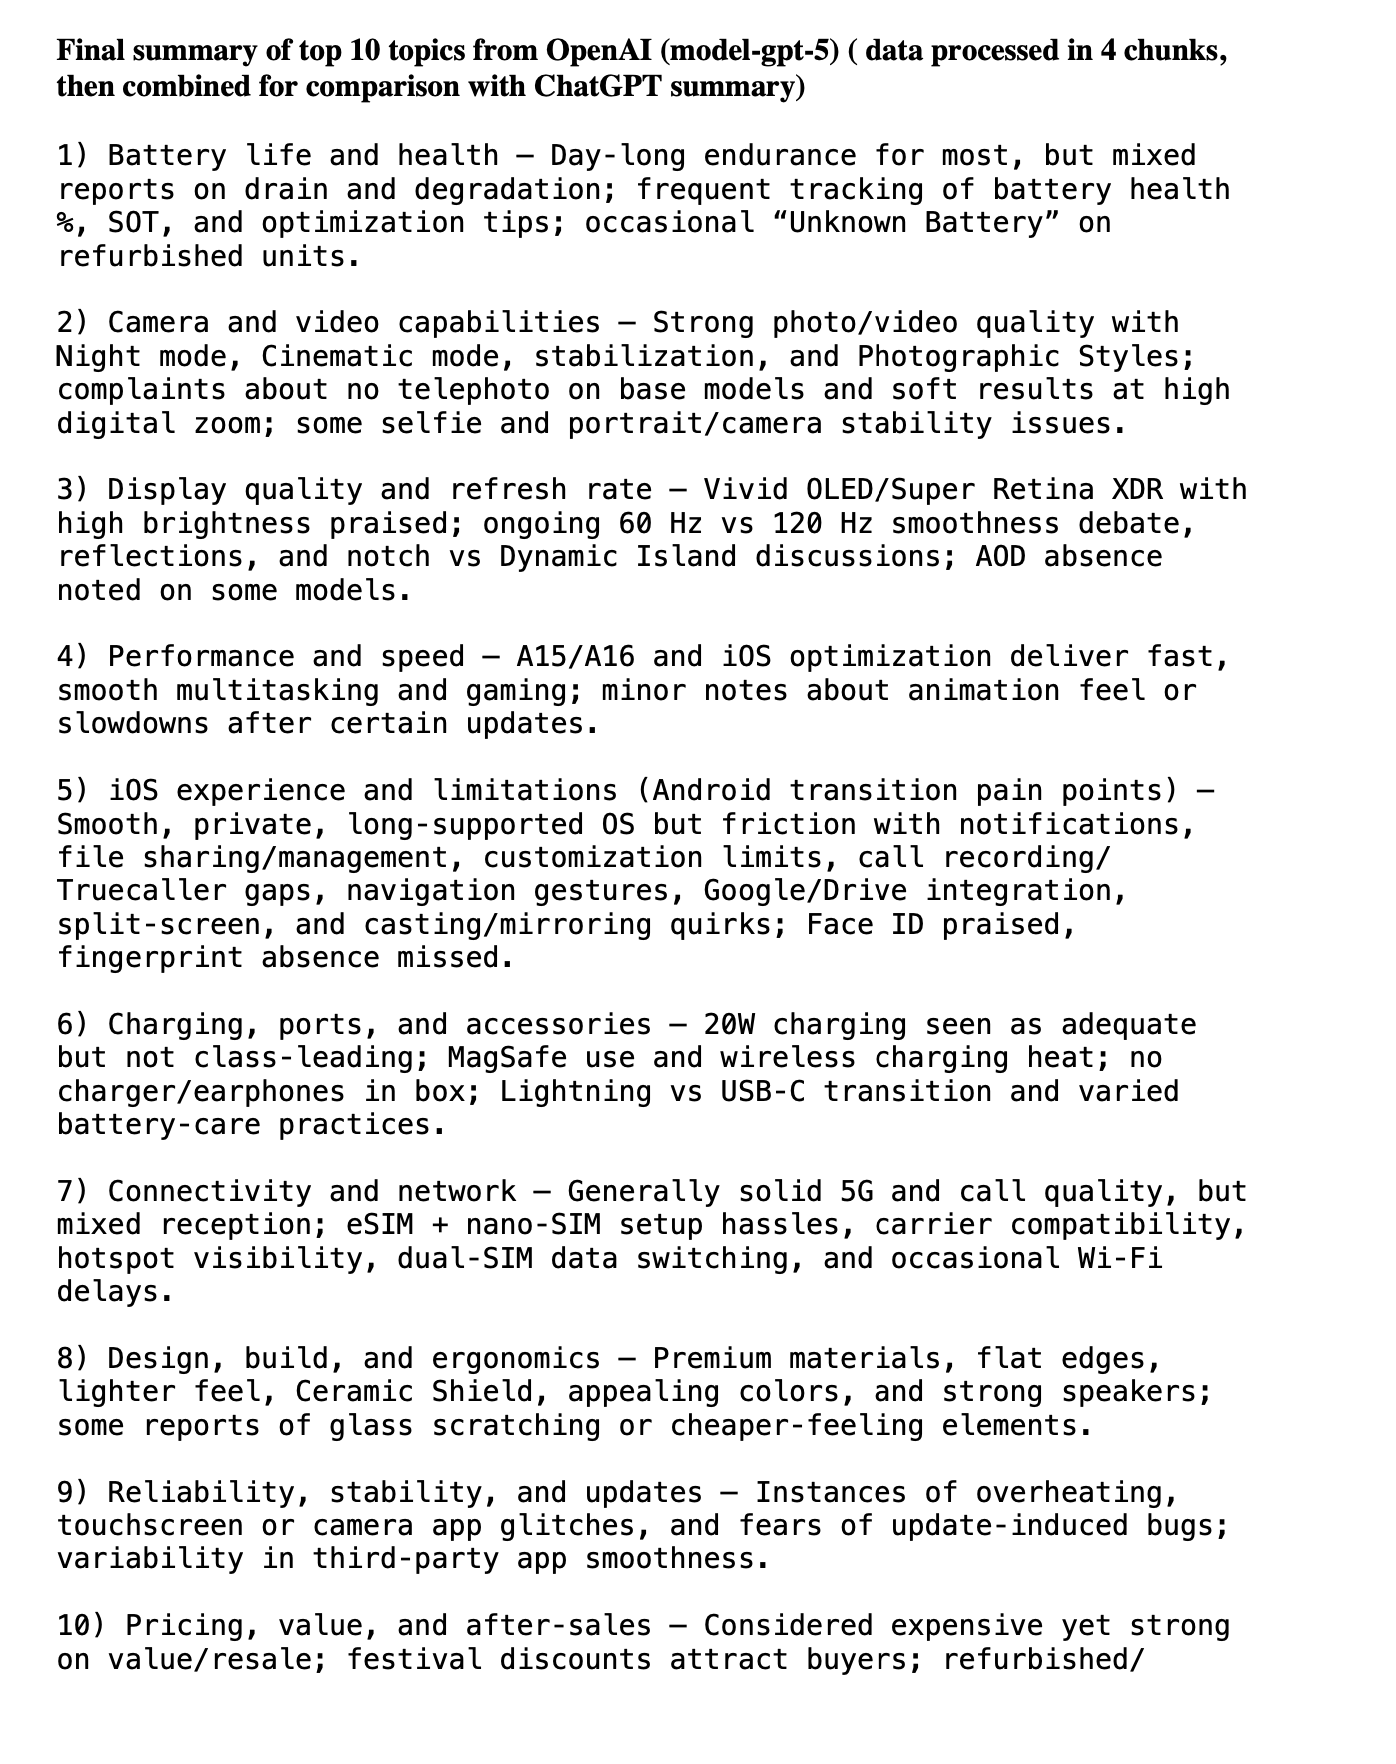

In [33]:
top100_200 = sorted_df.iloc[100:200]['review']
top100_200.to_csv('top100_200_wordcounts.csv', index=False)
# sentiment analysis from purplexity
prompt = '''sentiment analysis from purplexity'''
# observation? Many people are positive with camera quality and negative with battery life.

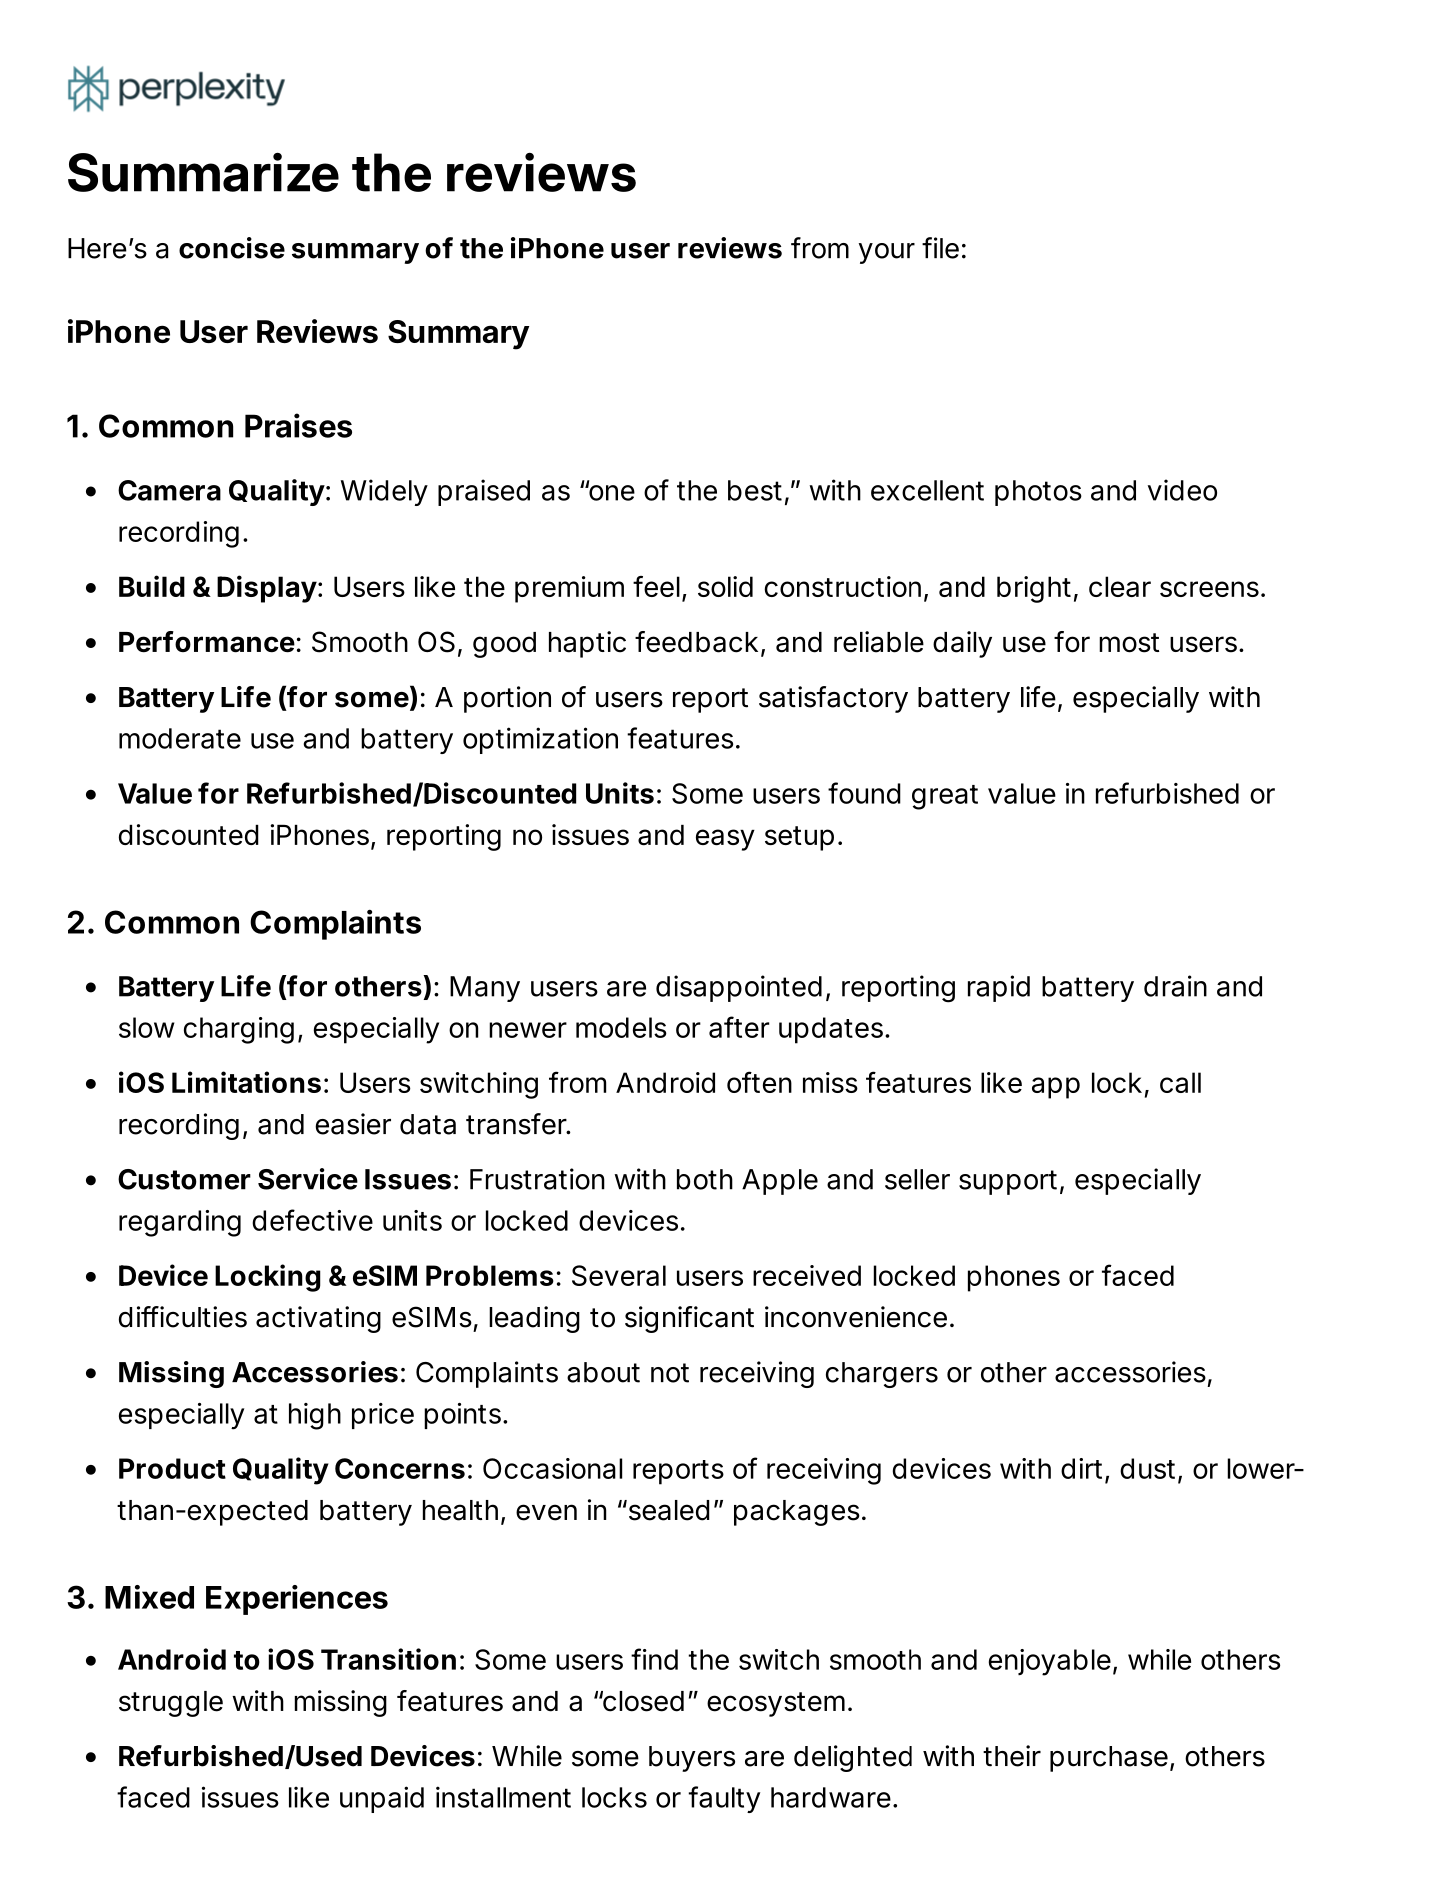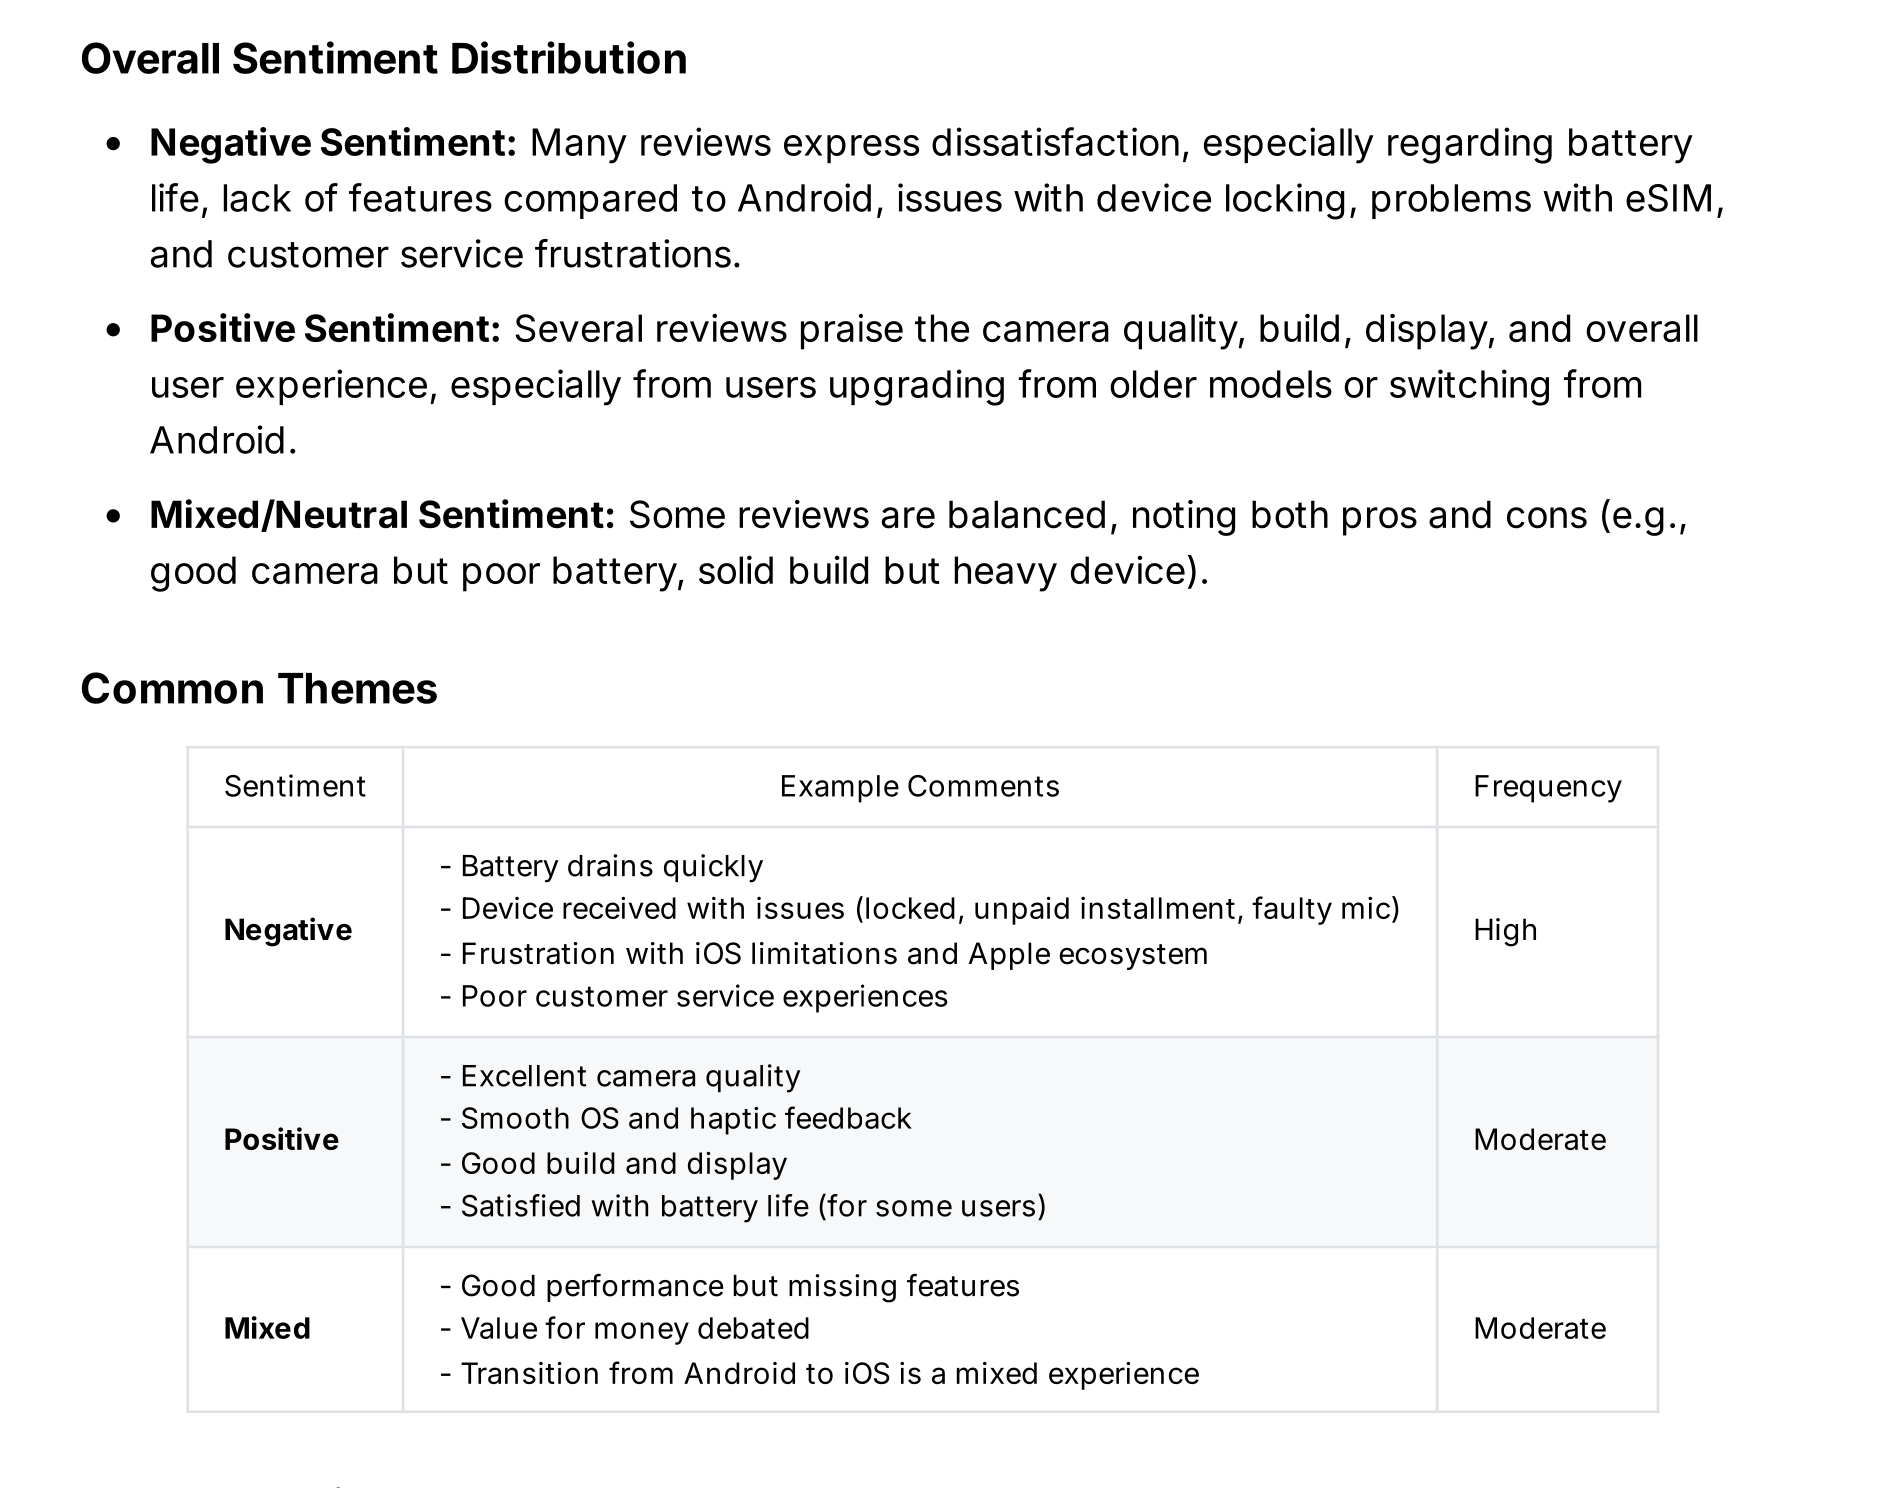

In [21]:
# Pickup another 500 wordcounts, see is it repro the same as above?
# major catagerious, more detailed summary
# In entire review, what are the top 10 comments? or topics.

In [22]:
# Sentiment analysis using VADER
analyzer = SentimentIntensityAnalyzer()
def analyze_reviews_sentiment(text):
  #Analyze sentiment with error handling
  if pd.isna(text) or not isinstance(text, str) or len(text.strip()) == 0:
      return {'neg': 0, 'neu': 1, 'pos': 0, 'compound': 0}
  try:
      sentiment_scores = analyzer.polarity_scores(text)
      return sentiment_scores
  except Exception as e:
      print(f"Error analyzing sentiment: {text[:50]}, error: {e}")
      return {'neg': 0, 'neu': 1, 'pos': 0, 'compound': 0}

df['sentiment_scores'] = df['review'].apply(analyze_reviews_sentiment)
# Extract individual sentiment components
df['neg'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['neu'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['pos'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])
print(df[['review', 'compound', 'pos', 'neu', 'neg']].head())
#print(df['compound'].describe())

# Get distribution of sentiment categories
print(f"Positive (≥0.05): {(df['compound'] >= 0.05).sum()}")
print(f"Negative (<=-0.05): {(df['compound'] <= -0.05).sum()}")
print(f"Neutral (-0.05 to 0.05): {((df['compound'] > -0.05) & (df['compound'] < 0.05)).sum()}")

                                              review  compound    pos    neu  \
0  No charger Every thing is good about iPhones, ...   -0.7467  0.059  0.811   
1  iPhone 13 256GB It look so fabulous, I am andr...    0.9717  0.370  0.630   
2  Flip camera option nill I tried to flip camera...   -0.6632  0.000  0.945   
3                               Product 100% genuine    0.0000  0.000  1.000   
4  Good product Happy to get the iPhone 13 in Ama...    0.8074  0.509  0.491   

     neg  
0  0.130  
1  0.000  
2  0.055  
3  0.000  
4  0.000  
Positive (≥0.05): 1967
Negative (<=-0.05): 569
Neutral (-0.05 to 0.05): 225


In [56]:
# Add more features - camera, battery and network and deepdive.
df['camera'] = df['review'].apply(lambda x: 1 if 'camera' or 'Camera' in x.lower() else 0)
df['battery'] = df['review'].apply(lambda x: 1 if 'battery' or 'Battery' in x.lower() else 0)
df['network'] = df['review'].apply(lambda x: 1 if 'network' or 'Network' in x.lower() else 0)
df['display'] = df['review'].apply(lambda x: 1 if 'display' or 'Display' in x.lower() else 0)

print(f"Camera: {(df['camera'] == 1).sum()}")
print(f"Battery: {(df['battery'] == 1).sum()}")
print(f"Network: {(df['network'] == 1).sum()}")
print(f"Display: {(df['display'] == 1).sum()}")

print(f"Deep dive Camera review:\n")
print(df[df['camera']==1]['review'].head())
print(f"\nDeep dive battery review:\n")
print(df[df['battery']==1]['review'].head())
print(f"\nDeep dive network review:\n")
print(df[df['network']==1]['review'].head())
#Camera - Front camera, back camera, or camera SW/HW.
df['camera_front_camera'] = df['review'].apply(lambda x: 1 if 'front camera' in x.lower() else 0)
df['camera_back_camera'] = df['review'].apply(lambda x: 1 if 'back camera' in x.lower() else 0)
print(f"Camera Front Camera: {(df['camera_front_camera'] == 1).sum()}")
print(f"Camera Back Camera: {(df['camera_back_camera'] == 1).sum()}")
print(f"Deep dive Camera Front Camera review:\n")
print(df[df['camera_front_camera']==1]['review'].head())
# Use SQL take tree based approach : camera -->
# 1. Camera Front Camera
# 2. Camera Back Camera
# Topic model to search any issues wrt to front camera LLM : BERT

Camera: 2761
Battery: 2761
Network: 2761
Display: 2761
Deep dive Camera review:

0    No charger Every thing is good about iPhones, ...
1    iPhone 13 256GB It look so fabulous, I am andr...
2    Flip camera option nill I tried to flip camera...
3                                 Product 100% genuine
4    Good product Happy to get the iPhone 13 in Ama...
Name: review, dtype: object

Deep dive battery review:

0    No charger Every thing is good about iPhones, ...
1    iPhone 13 256GB It look so fabulous, I am andr...
2    Flip camera option nill I tried to flip camera...
3                                 Product 100% genuine
4    Good product Happy to get the iPhone 13 in Ama...
Name: review, dtype: object

Deep dive network review:

0    No charger Every thing is good about iPhones, ...
1    iPhone 13 256GB It look so fabulous, I am andr...
2    Flip camera option nill I tried to flip camera...
3                                 Product 100% genuine
4    Good product Happy to get the iP

In [57]:
# Deep dive into camera review
df['word_count_camera'] = df[df['camera']==1]['review'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
sorted_df_camera = df[df['word_count_camera']>0].sort_values(by='word_count_camera', ascending=False)
print(f"Deep dive into camera review:\n")
cleaned_df_camera = sorted_df_camera.drop_duplicates(subset='review')
print(cleaned_df_camera[['review']].head())
cleaned_df_camera['review'].to_csv('sorted_df_camera.csv', index=False)


Deep dive into camera review:

                                                 review
1645  1st purchase was great! This one was not! I ha...
2718  Review after 1 week of usage Got it for 65K on...
73    Awesome ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ...
947   iPhone XR to iPhone 15 Just made the transitio...
2710  Android to Apple Transition - Not a very smoot...


#Promt eng using OpenAI for camera reviews:    
# prompt = f"""
# Extract the top 10 topics discussed in the following text.
# Focus on only on Camera quality realted topics.
# Return the result as a numbered list with a short description for each topic.

#Text:
# \"\"\"
# {input_text} *is from "cleaned_df_camera"*
# \"\"\"

1) Overall photo quality and color accuracy: Repeatedly praised for sharp detail and true-to-life colors with pleasing, natural skin tones; a few users found images occasionally oversaturated (especially on the front camera).

2) Low-light/Night mode performance: Often rated very good to excellent, with clearer, brighter night photos than older models; however, some users reported noise, softness, or “night photography sucks” in tougher scenes, especially with ultra‑wide and selfies.

3) Video quality and stabilization: A standout strength—stable, smooth footage with excellent detail; Cinematic mode and Dolby Vision HDR are frequently praised, and many call iPhone video best-in-class.

4) Portrait mode results and issues: Generally strong subject separation and pleasing bokeh; highlights include auto‑portrait detection. A few users saw app crashes or warmth/lag when shooting multiple portraits.

5) Selfie/front camera quality: Mixed feedback—some call it very good with accurate tones, others find it average or unflattering (showing blemishes, odd skin tones), and a few reported defective/nonworking front cameras.

6) Ultra‑wide lens performance and consistency: Good field of view and dynamic range consistency when switching lenses; performance drops in low light with softer detail and more noise compared to the main camera.

7) Zoom and telephoto limitations: Lack of a dedicated telephoto lens on non‑Pro models is a common complaint; digital zoom (e.g., 5x) is frequently described as soft or “not good,” and optical zoom options are limited.

8) Focus and close‑up/macro capability: Reports of autofocus struggling with small text or very close subjects; macro photography isn’t supported on base models, leading to soft or unfocused close‑ups for some use cases.

9) Lens flare/glare and artifacts: Noted lens flare/ghosting around point light sources at night; several users called this a recurring iPhone issue affecting image quality in certain lighting.

10) Reliability and thermal impact on camera: A subset experienced camera defects (shaking/buzzing, red line artifacts, “unknown” camera part warnings), app crashes, or heating near the camera during use—issues that can degrade image/video quality or stability.


# Continue promt eng on front camera reviews
1) Skin-tone accuracy in selfies
- Mixed feedback: some praise true-to-life facial tones, while others report inaccurate tones that look unflattering.

2) High detail vs lack of “beauty” smoothing
- Many note the selfie cam captures every blemish and can make faces look harsher; fewer built‑in beautification options than many Android phones.

3) Low‑light/indoor selfie performance
- Frequently cited as weak: indoor/low‑light selfies can be noisy or blurry; a few users say it’s acceptable, but many want software improvements.

4) Color cast and white balance in selfies
- Reports of yellowish/selfie images and inconsistent exposure/lighting on faces in certain conditions.

5) Overall selfie quality vs Android
- Several Android switchers feel Android phones (even cheaper ones) produce more flattering selfies; others are happy with iPhone selfies.

6) Portrait selfies (quality and reliability)
- When it works, edge detection/portrait selfies are liked; a few users mention instability/crashes in Portrait mode (impacting selfie use cases).

7) Front camera expectations vs price/brand
- Some find the selfie camera “average” or “not up to iPhone standards” for the price; others say selfies are “flagship-level.”

8) Positive experiences with selfies
- A notable set of reviews say “selfies have never looked this good,” highlighting sharpness and pleasing skin tones in good light.

9) Year‑over‑year changes to the selfie camera
- Perception that iPhone 13 and 14 front cameras feel very similar; no dramatic upgrade noted by most users.

10) Front camera defects in refurbished units
- Multiple reports of non‑working selfie cameras, black lines in selfies, or “non‑genuine” camera parts flagged by Apple diagnostics.


#Continue promt eng on rear camera reviews
1) Video quality and stabilization
- Widely praised rear-camera video with smooth stabilization. Features like Dolby Vision HDR, Cinematic mode (focus rack), Action mode, and gimbal-like steadiness are called best-in-class.

2) Low-light/night performance
- Night mode on the rear camera is generally strong with detailed, clean shots; some users still report noise and softness in very dark scenes.

3) Color accuracy and dynamic range
- Rear-camera photos are noted for true-to-life colors and balanced dynamic range; consistency when switching between wide and ultra‑wide is highlighted.

4) Main sensor resolution and detail (48MP vs 12MP)
- The 48MP main camera (iPhone 15) brings noticeably higher detail and crop flexibility; older 12MP sensors (iPhone 13/14) still produce sharp, reliable results.

5) Ultra‑wide lens performance
- 0.5x ultra‑wide captures expansive scenes and works well in daylight; quality drops in low light with more noise/softness than the main lens.

6) Zoom and telephoto limitations
- Base models lack a telephoto lens. Optical reach is limited and digital zoom (e.g., 5x) often looks soft or pixelated; macro/close‑focus capability is also limited.

7) Portrait mode (rear camera)
- Rear portraits have pleasing bokeh and separation; auto‑portrait detection is appreciated. A few users report app crashes or warming while shooting portraits.

8) Optical image stabilization for photos
- Sensor‑shift OIS on the rear camera helps keep photos sharp in low light and reduces blur from hand shake.

9) Lens flare/ghosting in night scenes
- Noted rear-camera issue: visible flare/ghosting around bright point lights at night, affecting both photos and videos.

10) Reliability and defects impacting rear-camera quality
- Some units reported autofocus failures, shaking/buzzing, overheating during camera use, portrait mode crashes, non‑genuine camera modules, lens scratches/cracks, coating peel, dust ingress, or post‑update flash issues.


In [45]:
# Deep dive into battery reviews
df['word_count_battery'] = df[df['battery']==1]['review'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
sorted_df_camera = df[df['word_count_battery']>0].sort_values(by='word_count_battery', ascending=False)
print(f"Deep dive into battery review:\n")
cleaned_df_camera = sorted_df_camera.drop_duplicates(subset='review')
print(cleaned_df_camera[['review']].head())
cleaned_df_camera['review'].to_csv('sorted_df_battery.csv', index=False)

Deep dive into battery review:

                                                 review
1645  1st purchase was great! This one was not! I ha...
111   Review after 1 week of usage Got it for 65K on...
947   iPhone XR to iPhone 15 Just made the transitio...
1201  Use an Iphone for a month before planning to b...
2146  feel good yet(6 month) IOS 17.5 (current versi...


# Continue promt eng on Battery reviews
1) Overall battery life/endurance
- Reports range from “1–2 days on light/moderate use” to “dies within hours” under heavier use; many say iPhone 13/14 last a full day, while some units (esp. renewed) drain unexpectedly fast.

2) Battery health on renewed/refurbished units
- Many cite initial health between 80–95% (some 100%, some as low as 82–86%); several note rapid health decline (e.g., 100% → mid‑80s within months) and expectations that >90% should be standard.

3) Charging speed and behavior
- 20W wired charging commonly mentioned; typical times reported ~1–1.5 hours from ~20% to ~80–90%. Compared to Android, charging feels slow; “Optimized Battery Charging” and trickle behavior near 100% noted. No charger in box is common.

4) Overheating tied to drain
- Heat during charging, camera use, gaming, hotspotting, and initial setup/indexing; wireless/MagSafe charging called out for extra heat. Some experienced shutdowns/boot loops until battery depleted.

5) iOS updates and battery impact
- iOS 16/17 updates frequently linked to increased drain or heating for some; others say it improves after the phone “learns” usage. Several users fear updating due to possible battery/display issues.

6) Battery‑saving practices shared by users
- Tips include: keep charge between ~20–80/95%, enable Optimized Charging, disable background app refresh and unnecessary location services, avoid wireless charging, turn off vibration, and manage 5G.

7) Network/5G effects on battery
- 5G and weak/variable signal are blamed for heavy drain; hotspot use can deplete in ~5 hours; dual 5G standby mentioned. Some toggle 5G off to save power.

8) Screen‑on time (SOT) outcomes
- Reported SOT varies widely: ~4.5–5 hours (mixed/heavy use) up to ~7–8 hours (lighter use). Usage pattern (camera, gaming, streaming) strongly affects results.

9) Battery service, warranty, and “Unknown Battery” flags
- “Unknown Battery” messages and low health prompt service visits; mixed experiences with seller/Apple support, including battery replacements, denial due to third‑party parts, and confusion over warranties/cycle counts.

10) Model‑to‑model battery comparisons
- iPhone 13 generally praised over 12; 14 often described as similar to 13 (some say slightly better/faster to charge); 15 commonly reported at ~1–1.5 days; mini criticized for poor endurance; Pro/Pro Max seen as better for battery longevity.


# Continue promt eng on battery, Focus is only on iOS updates and battery impact realted topics

1) Post‑update battery drain (iOS 16/17) – Multiple users report worse battery life immediately after updating (notably iOS 16 and iOS 17/17.0.3), sometimes improving after a few days as the phone re‑indexes.

2) Heating after updates and during charging – Reports of overheating or getting very warm on iOS 17/17.0.3 (and occasionally after other updates), especially while charging or using the camera, which accelerates battery drain.

3) Update anxiety and auto‑update off – Several users fear iOS updates due to widely shared reports of battery drain, heating, or display issues; some keep auto‑updates disabled to avoid potential battery impacts.

4) Refurbished/renewed phones with low or rapidly falling battery health – Many renewed units arrive at 80–90% health, trigger “Unknown Battery” warnings, or drop health quickly (e.g., to mid‑80s in weeks), causing random shutdowns and return/warranty friction.

5) Idle/overnight drain variability – Mixed experiences from minimal (1–2%) to excessive (5–6% or more) overnight drain with no active use, suggesting background tasks, indexing, or configuration differences after updates.

6) Network features impacting battery (5G/hotspot) – 5G, frequent network changes, and hotspot usage significantly reduce battery life; some note hotspot draining a full charge in a few hours.

7) Optimized charging and 80% limit behavior – Users mention Optimized Battery Charging/80% limits and trickle charging to 100%; helps longevity but can confuse expectations about speed and “full” charges after updates.

8) Charging speed vs. heat trade‑offs – Typical results: ~50% in ~30 minutes with 20W, ~1–1.5 hours to full; wireless charging and fast charging can increase heat, which users link to faster battery wear.

9) Real‑world endurance and SOT spread – Reported screen‑on time ranges from ~4.5 to 8 hours; heavy camera/social/media days (post‑update or indexing) drain faster than “day‑plus” light‑use claims.

10) Battery/OS troubleshooting steps – Common remedies include backup → erase/restore, turning off background app refresh and some location services, disabling vibrations, waiting a few days post‑update for indexing to finish; results vary.


# Continue Promt eng on battery, Focus is only Network/5G effects on battery impact realted topics

1) 5G drains battery faster than 4G
- Several users report heavy drain when 5G is enabled (e.g., “5G consumes battery a lot… need to charge 3 times a day”), highlighting higher radio power use on 5G versus LTE.

2) Frequent network changes/handoffs accelerate drain and heat
- While traveling or in fluctuating coverage, users saw rapid battery drop (“hardly 3–4 hours if your network changes frequently”) and noticeable heating.

3) Mobile hotspot/tethering is a major battery hog
- Using the phone as a hotspot can deplete the battery quickly (“if you use hotspot then it will be drained in 5 hours”), reflecting high sustained modem and Wi‑Fi activity.

4) Weak cellular reception increases power draw
- Reports of poorer reception (e.g., “one bar” where Android had full LTE) imply the phone boosts transmit power longer, which typically reduces battery life.

5) Missing/limited carrier aggregation (4G+) may hurt efficiency
- “Not getting 4G+ on Airtel” suggests fewer aggregated bands and longer radio active time, which can indirectly worsen battery endurance during data use.

6) Dual 5G standby and dual SIM/eSIM can raise idle drain
- Users note dual 5G standby (Vi/Jio) and dual-SIM use; running two active radios/SIMs can increase background modem activity and standby battery usage.

7) iPhone 13 improved 5G endurance over iPhone 12
- One review notes iPhone 13’s longer battery life compared to iPhone 12’s “underwhelming” endurance for a 5G phone, showing generational efficiency gains on 5G.

8) Overnight idle drain potentially tied to network behavior
- Multiple complaints of unexplained overnight drops (e.g., 5–6% vs 1–2% on another device) hint at background network scans, weak-signal retries, or modem tasks.

9) Wi‑Fi/hotspot connection quirks can prolong radio scanning
- “Takes a lot of time to get detected by devices when hotspot is on” and “Wi‑Fi takes a lot of time to connect” can keep radios in active scan states, costing battery.

10) Carrier/eSIM provisioning issues can keep radios active
- Activation/lock/eSIM troubles (e.g., Straight Talk eSIM not working, wrong carrier lock) can trigger repeated network registration attempts, impacting standby battery until resolved.
